In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
dataset = pd.read_csv("./dataset/bank-additional-full.csv")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h1><i>Univariate Analysis Before any pre processing and feature engineering of data<i></h1>
<p>Analysis done for selecting the column that can be used for model fitting as well as the test for pre processing and feature engineering</p>

## For Categorical Data

In [3]:
categorical_columns = dataset.select_dtypes(include="object")
numeric_columns = dataset.select_dtypes(include=np.number)

In [4]:
# Descriptive statistics of the categorical column
def categorical_data_description(category: str) -> None: 
    print("--------------------------------------------------------")
    print(f"Unique values in column: {category} \n {dataset[category].unique()}")
    print("--------------------------------------------------------")
    print(f"Value Counts in column: {category} \n {dataset[category].value_counts()}")
    print("--------------------------------------------------------")
    print(f"Counts after grouping by outcome for {category}: \n {dataset['y'].groupby(dataset[category]).value_counts().to_json()}")
    print("--------------------------------------------------------")


In [5]:
# Descriptive statistics of the numeric column
def numerical_data_description(category: str) -> None: 
    print("--------------------------------------------------------")
    print(f"Descriptive information of {category}: \n{dataset[category].describe()}")
    print("--------------------------------------------------------")

In [6]:
# Count plot that can be plotted for categorical data
def count_plot(category: str, horizontal: bool=False) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    plt.suptitle(f"Visualization of {category}")

    if horizontal:
        sns.countplot(ax=axes[0], data=dataset, y=dataset[category])
        axes[0].set_title("Count Plot")

        # For comparing with the outcome
        sns.countplot(ax=axes[1], data=dataset, y=dataset[category], hue="y")
        axes[1].set_title("Comparision with output") 

    else:
        sns.countplot(ax=axes[0], data=dataset, x=dataset[category])
        axes[0].set_title("Count Plot") 
        
        # For comparing with the outcome
        sns.countplot(ax=axes[1], data=dataset, x=dataset[category], hue="y")
        axes[1].set_title("Comparing with output") 
    
    plt.show()

In [27]:
#Visualization of continuous data
def histogram_plot(category: str) -> None:
    # plt.figure(figsize=(8,6))
    plt.suptitle(f"Histogram of {category}")
    sns.histplot(data=dataset, x=dataset[category], kde=True)
    plt.plot()

In [28]:
def univariate_viz_with_desc(category, viz_orient=False):
    if category in categorical_columns:
        categorical_data_description(category)
        count_plot(category, viz_orient)  
    elif category in numeric_columns:
        numerical_data_description(category)
        histogram_plot(category)
    else:
        print("No such category in dataset. Check spelling or the dataset.")

--------------------------------------------------------
Unique values in column: job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------
Value Counts in column: job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for job: 
 {"('admin.', 'no')":9070,"('admin.', 'yes')":1352,"('blue-collar', 'no')":8616,"('blue-collar', 'yes')":638,"('entrepreneur', 'no')":1332,"('entrepreneur', 'yes')":124,"('housemaid', 'no')":954,"('housemaid', 'yes')":106,"('management', 'no')":2596,"('management', 'yes')":3

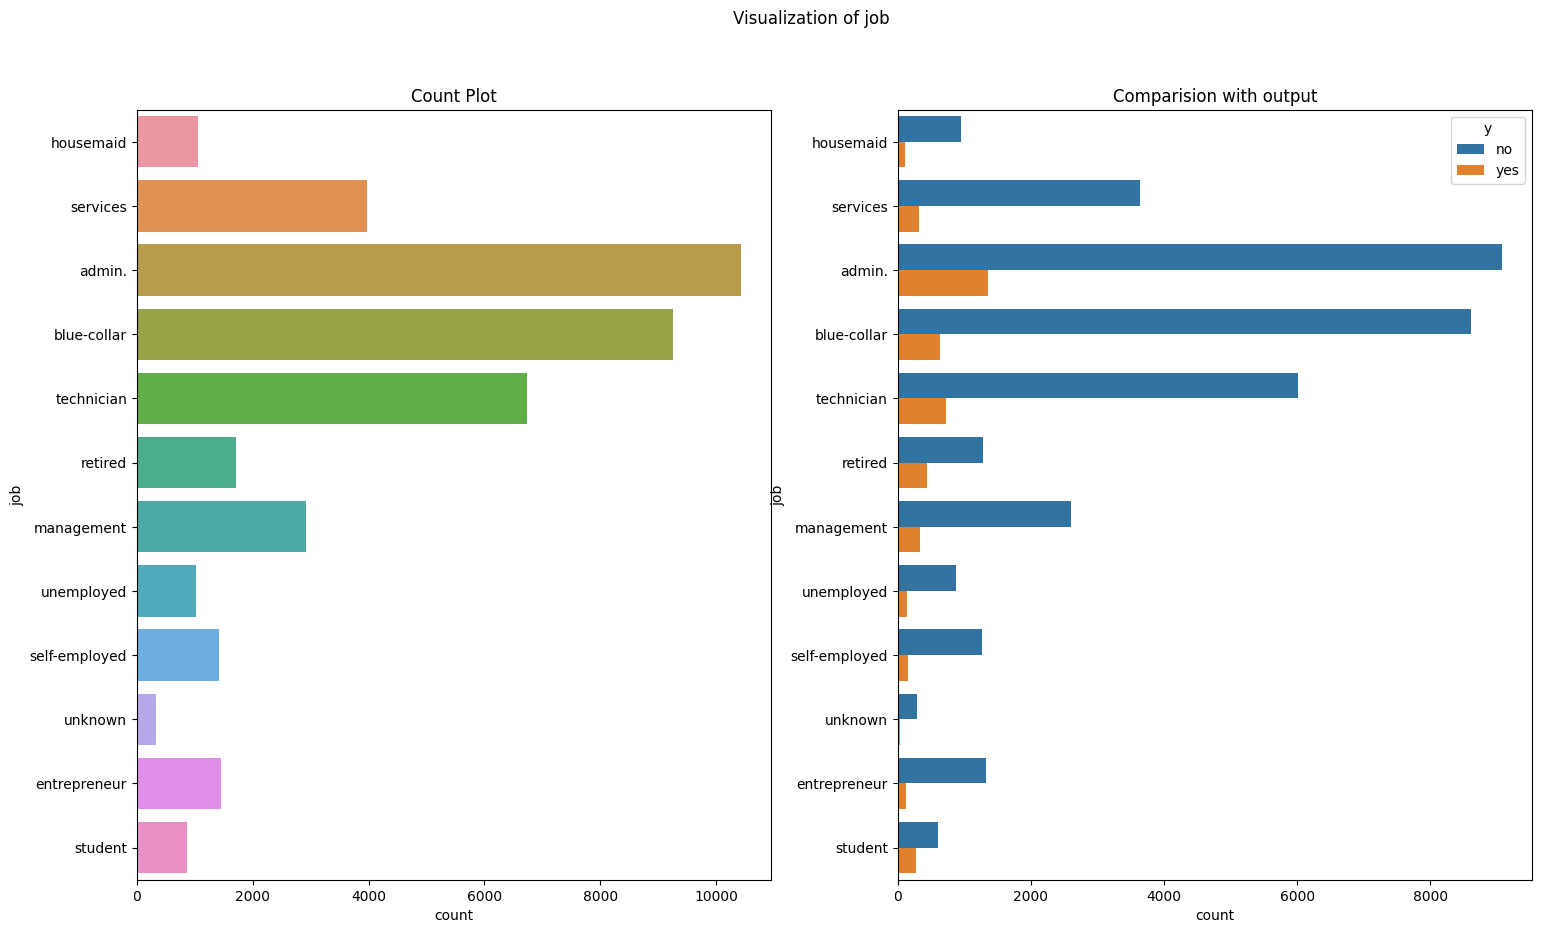

In [9]:
univariate_viz_with_desc("job", viz_orient=True)

<p style="color: yellow;"><i>most of the clients have a job of an admin, and there are 330 clients with unknown jobs. As well most clients probable of accepting a term deposite are form admin profession too.<i></P>

--------------------------------------------------------
Unique values in column: marital 
 ['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------
Value Counts in column: marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for marital: 
 {"('divorced', 'no')":4136,"('divorced', 'yes')":476,"('married', 'no')":22396,"('married', 'yes')":2532,"('single', 'no')":9948,"('single', 'yes')":1620,"('unknown', 'no')":68,"('unknown', 'yes')":12}
--------------------------------------------------------


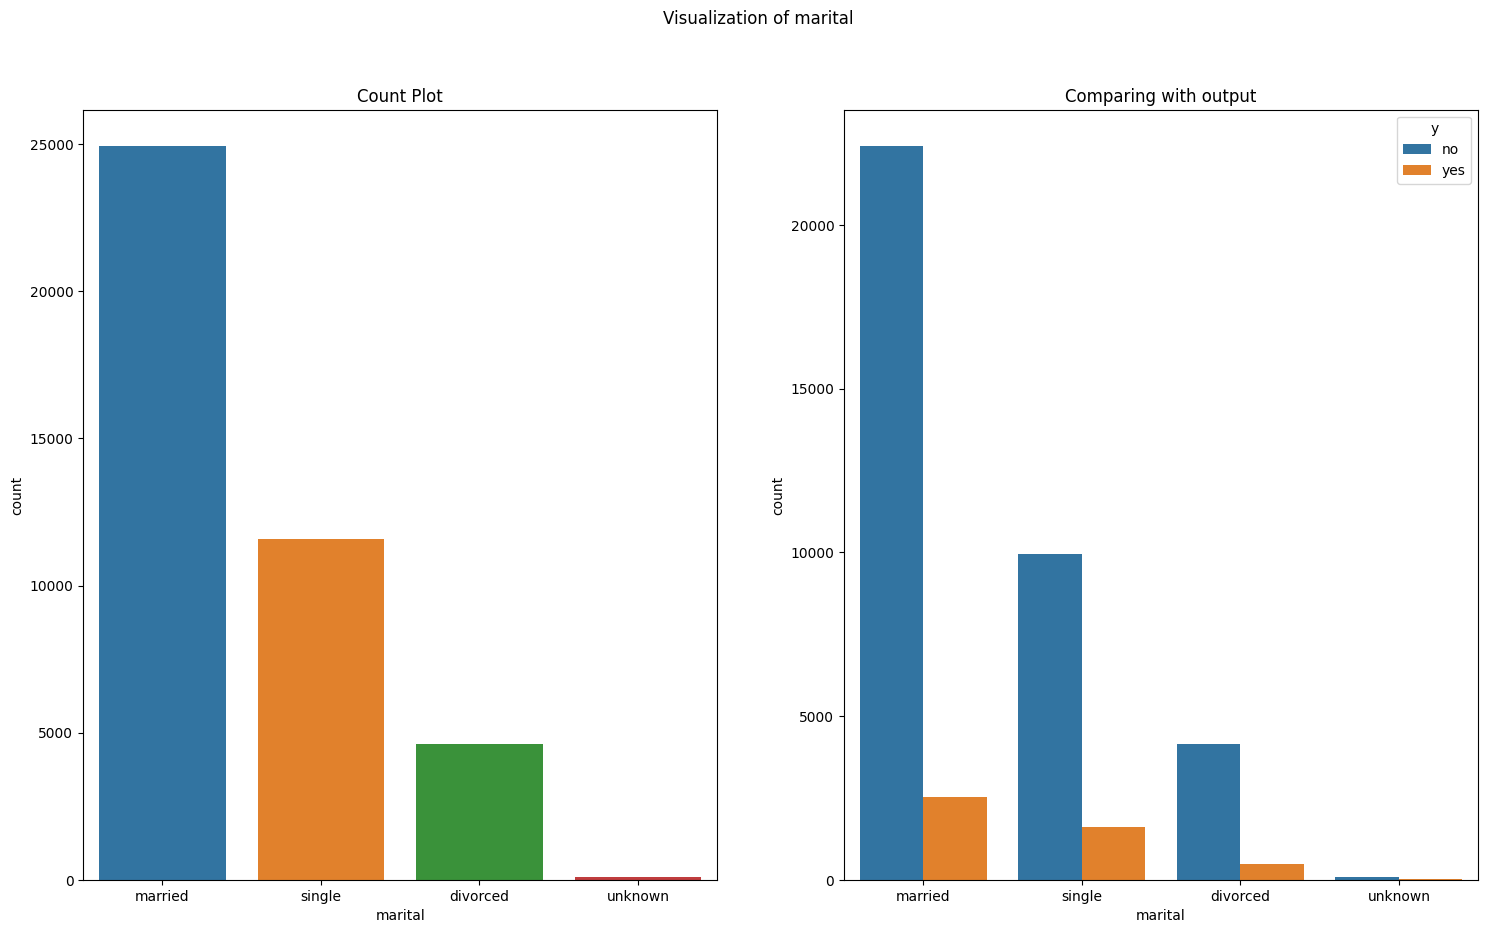

In [10]:
univariate_viz_with_desc("marital")

<p style="color: yellow;"><i>Most clients are married with maximum probability of accepting term deposite.<i></P>

--------------------------------------------------------
Unique values in column: education 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------
Value Counts in column: education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for education: 
 {"('basic.4y', 'no')":3748,"('basic.4y', 'yes')":428,"('basic.6y', 'no')":2104,"('basic.6y', 'yes')":188,"('basic.9y', 'no')":5572,"('basic.9y', 'yes')":473,"('high.school', 'no')":8484,"('high.school', 'yes')":1031,"('illiterate', 'no')":14,"('illiterate', 'yes')":4,"('professional.course', 'no')":4648,"('professional.course',

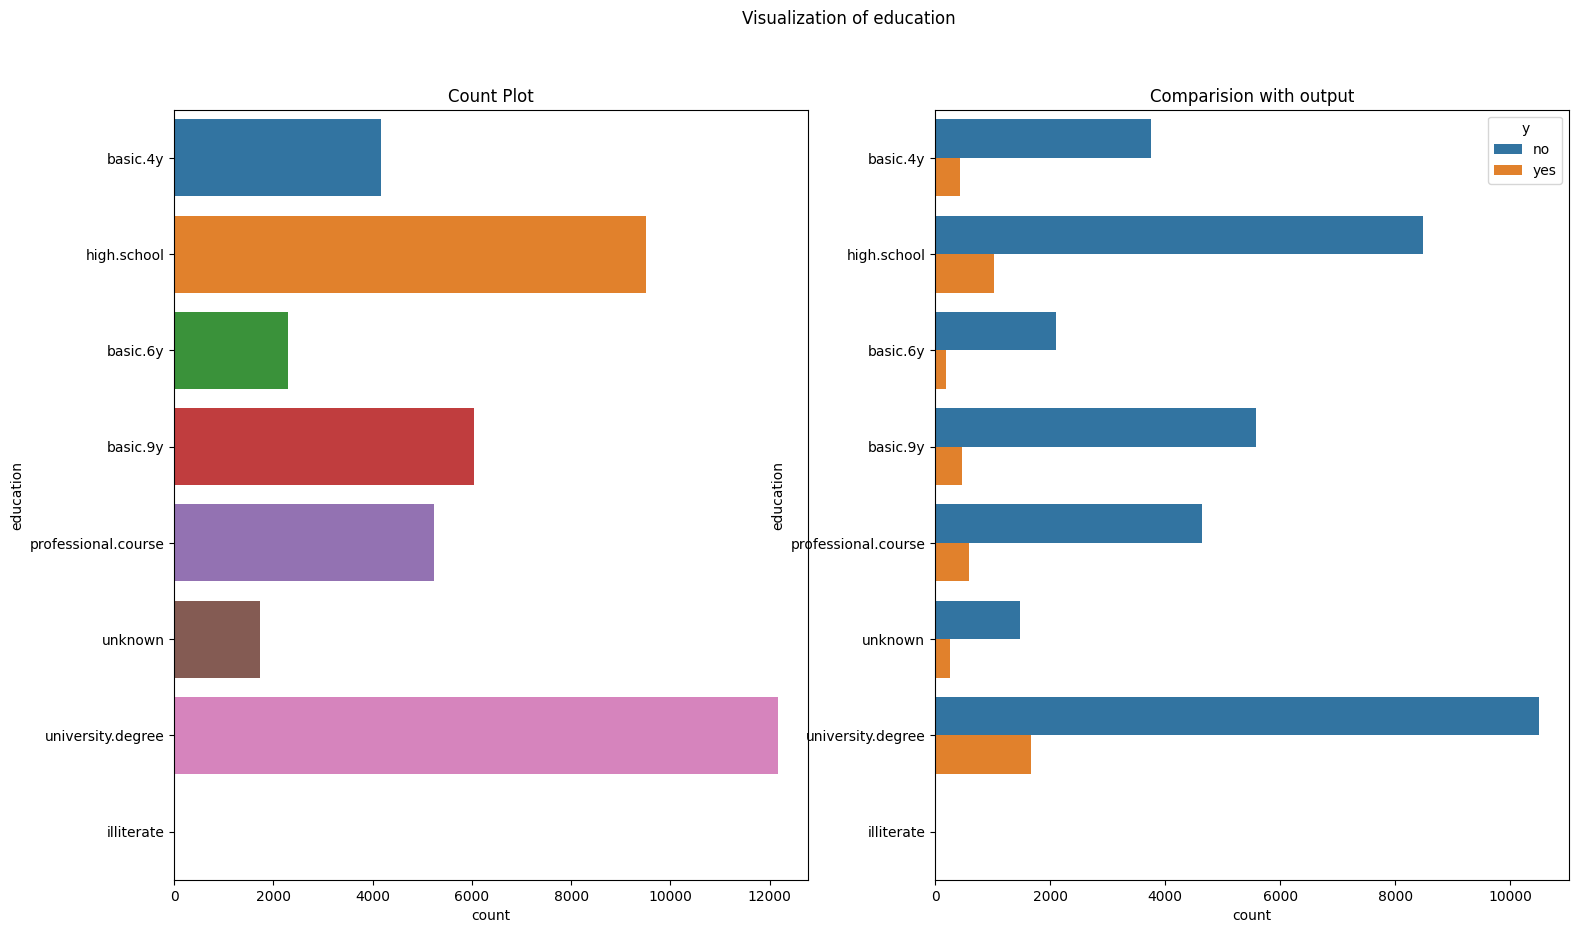

In [11]:
univariate_viz_with_desc("education", viz_orient=True)

<p style="color: yellow;"><i>Most clients have a university degree; with maximum number of accepting the term deposite scheme. And there are few illeterate clients, could remove those row.</i></p>

--------------------------------------------------------
Unique values in column: default 
 ['no' 'unknown' 'yes']
--------------------------------------------------------
Value Counts in column: default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for default: 
 {"('no', 'no')":28391,"('no', 'yes')":4197,"('unknown', 'no')":8154,"('unknown', 'yes')":443,"('yes', 'no')":3}
--------------------------------------------------------


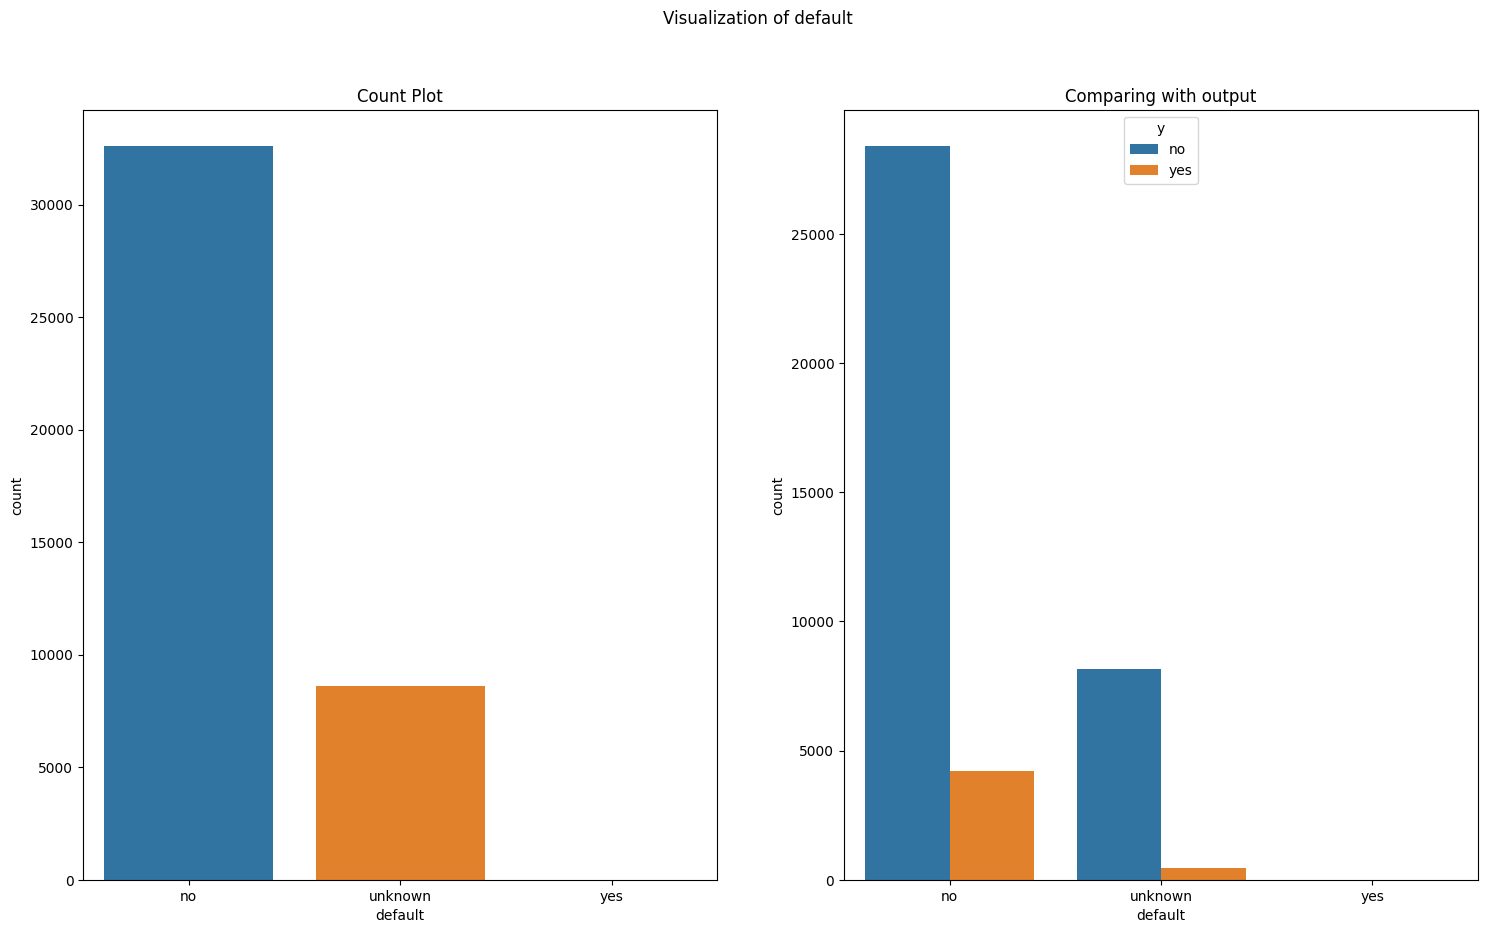

In [12]:
univariate_viz_with_desc("default")

<p style="color: yellow;"><i>Most client don't have a cerdit and those are the one most probably accepting term deposite. As well there are unknown data, could remove those row.</i></p>

--------------------------------------------------------
Unique values in column: housing 
 ['no' 'yes' 'unknown']
--------------------------------------------------------
Value Counts in column: housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for housing: 
 {"('no', 'no')":16596,"('no', 'yes')":2026,"('unknown', 'no')":883,"('unknown', 'yes')":107,"('yes', 'no')":19069,"('yes', 'yes')":2507}
--------------------------------------------------------


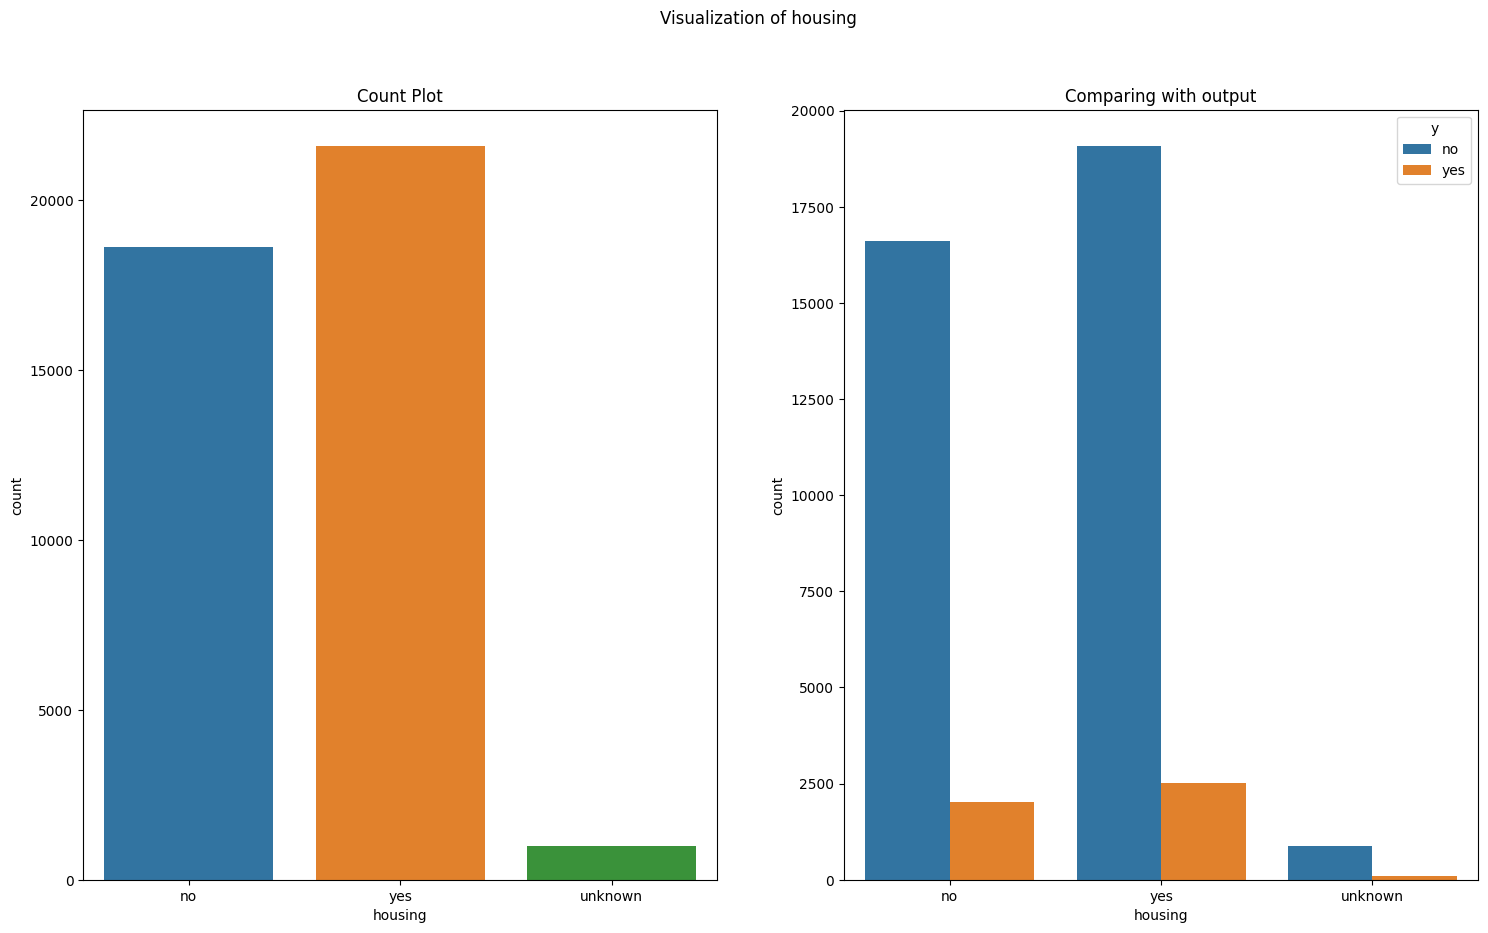

In [13]:
univariate_viz_with_desc("housing")

<p style="color: yellow;"><i>Most client have a house loan and those are the one most probably accepting term deposite.</i></p>

--------------------------------------------------------
Unique values in column: loan 
 ['no' 'yes' 'unknown']
--------------------------------------------------------
Value Counts in column: loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for loan: 
 {"('no', 'no')":30100,"('no', 'yes')":3850,"('unknown', 'no')":883,"('unknown', 'yes')":107,"('yes', 'no')":5565,"('yes', 'yes')":683}
--------------------------------------------------------


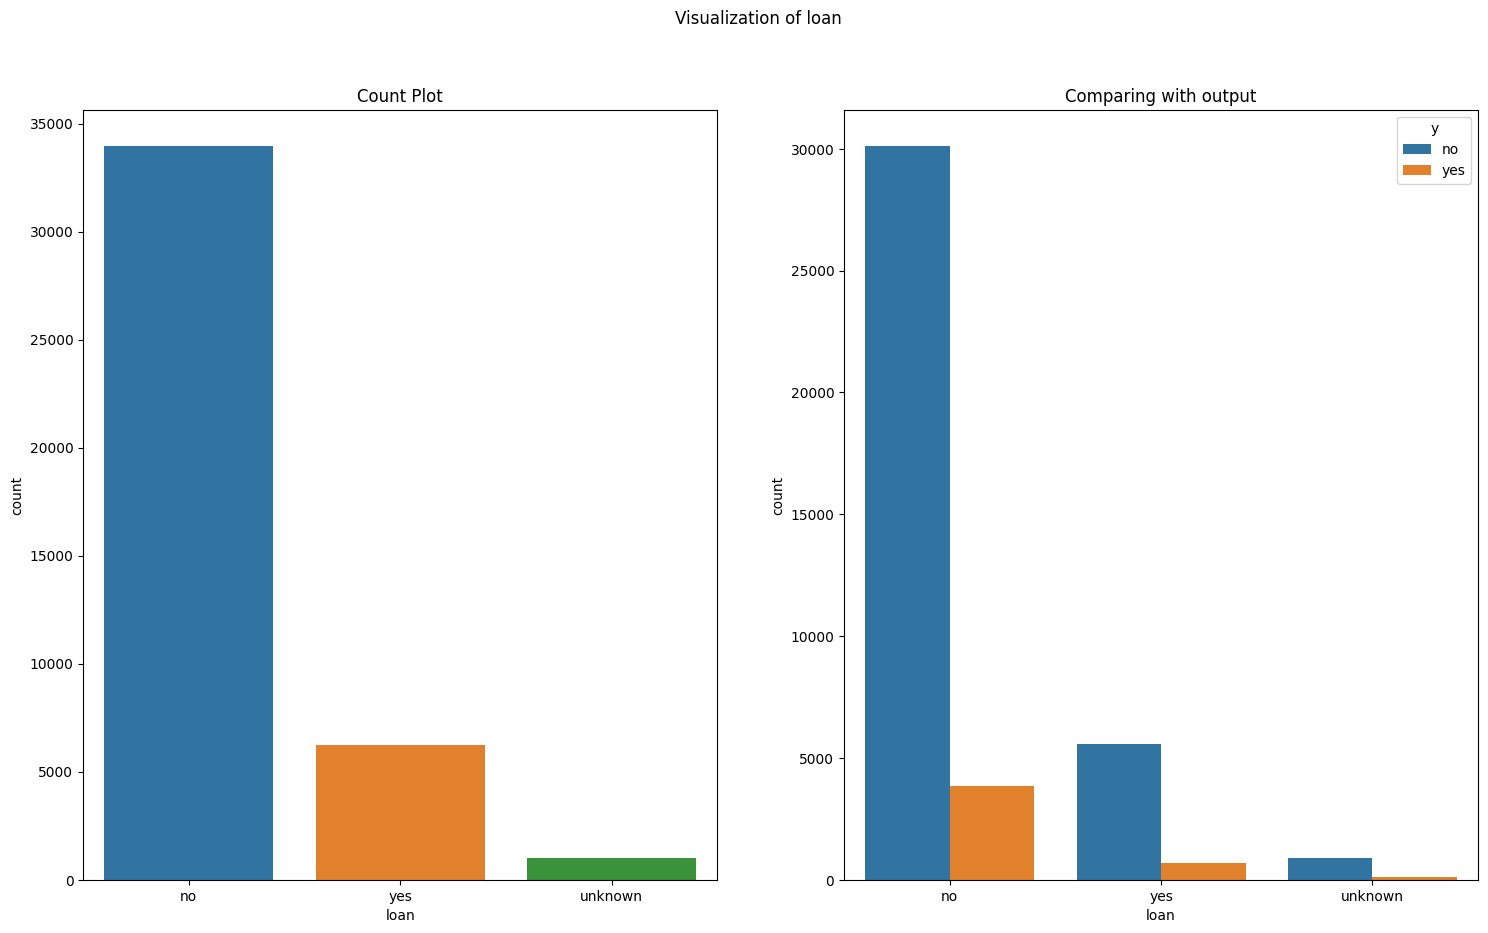

In [14]:
univariate_viz_with_desc("loan")

<p style="color: yellow;"><i>Most client don't have a personal loan and those are the one most probably accepting term deposite.</i></p>

--------------------------------------------------------
Unique values in column: contact 
 ['telephone' 'cellular']
--------------------------------------------------------
Value Counts in column: contact 
 cellular     26144
telephone    15044
Name: contact, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for contact: 
 {"('cellular', 'no')":22291,"('cellular', 'yes')":3853,"('telephone', 'no')":14257,"('telephone', 'yes')":787}
--------------------------------------------------------


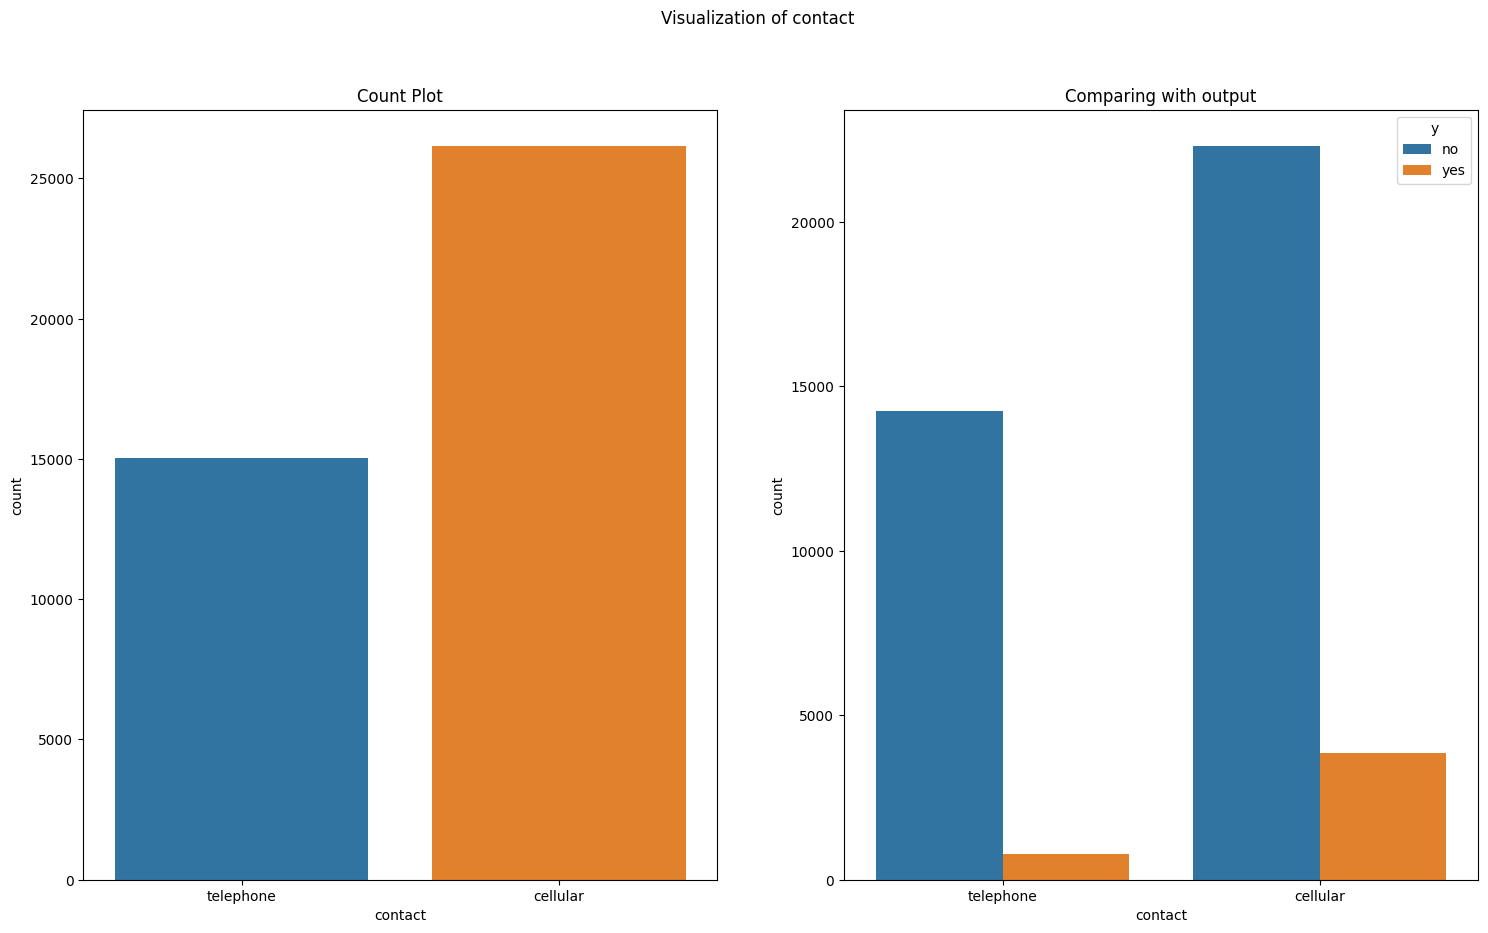

In [15]:
univariate_viz_with_desc("contact")

--------------------------------------------------------
Unique values in column: month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------------------------------------------
Value Counts in column: month 
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for month: 
 {"('apr', 'no')":2093,"('apr', 'yes')":539,"('aug', 'no')":5523,"('aug', 'yes')":655,"('dec', 'no')":93,"('dec', 'yes')":89,"('jul', 'no')":6525,"('jul', 'yes')":649,"('jun', 'no')":4759,"('jun', 'yes')":559,"('mar', 'yes')":276,"('mar', 'no')":270,"('may', 'no')":12883,"('may', 'yes')":886,"('nov', 'no')":3685,"('nov', 'yes')":416,"('oct', 'no')":403,"('oct', 'yes')":315,"('sep', 'no')":314,"('sep', 'yes')":256}
--------------------------------------------------------


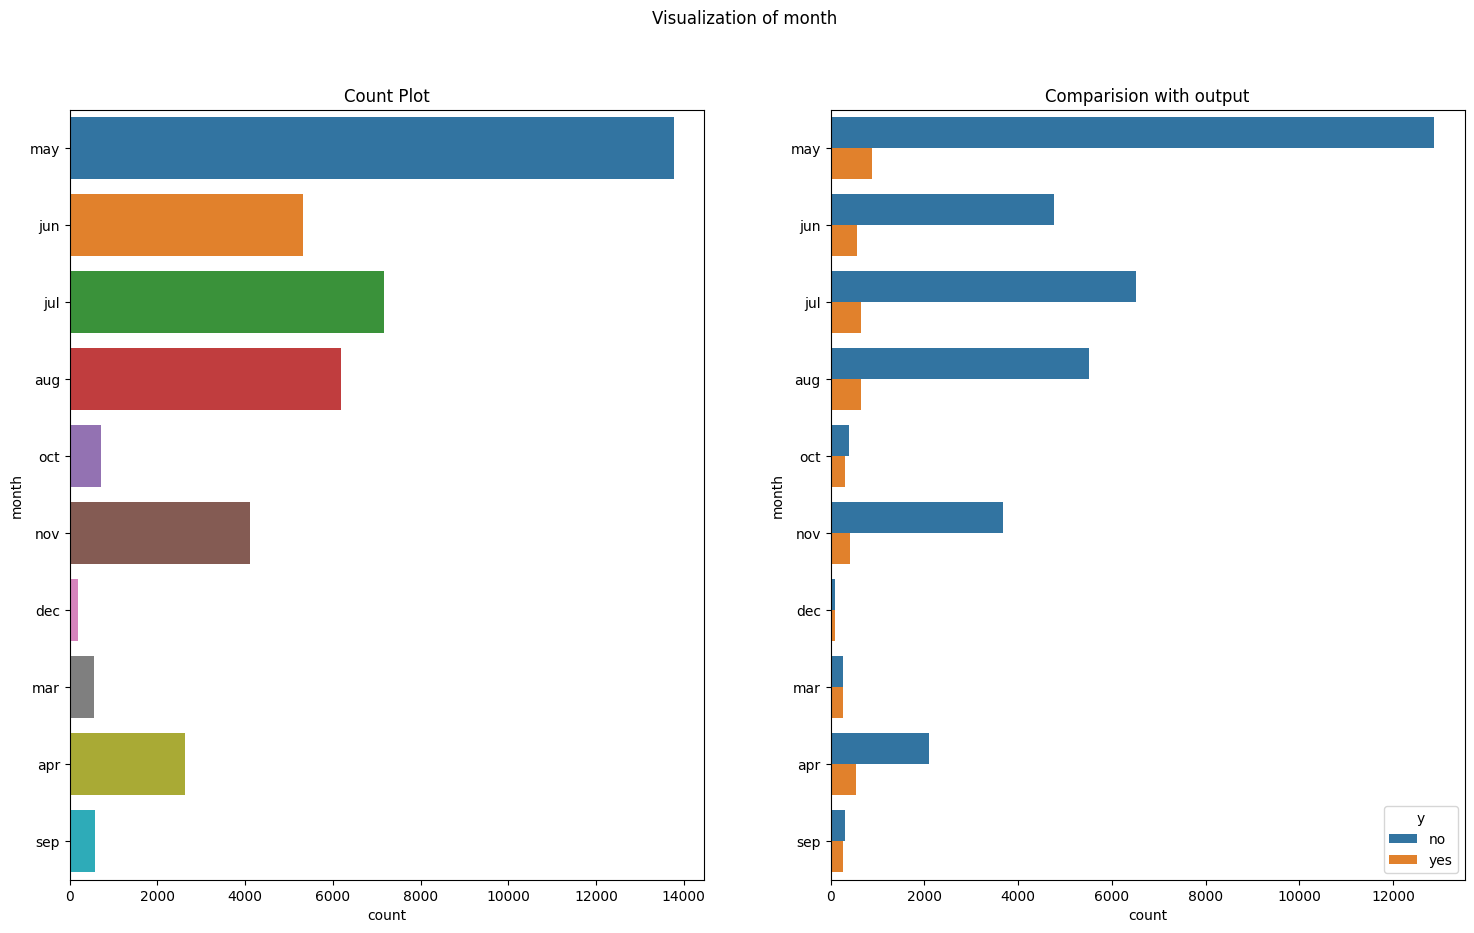

In [16]:
univariate_viz_with_desc("month", viz_orient=True)

--------------------------------------------------------
Unique values in column: day_of_week 
 ['mon' 'tue' 'wed' 'thu' 'fri']
--------------------------------------------------------
Value Counts in column: day_of_week 
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for day_of_week: 
 {"('fri', 'no')":6981,"('fri', 'yes')":846,"('mon', 'no')":7667,"('mon', 'yes')":847,"('thu', 'no')":7578,"('thu', 'yes')":1045,"('tue', 'no')":7137,"('tue', 'yes')":953,"('wed', 'no')":7185,"('wed', 'yes')":949}
--------------------------------------------------------


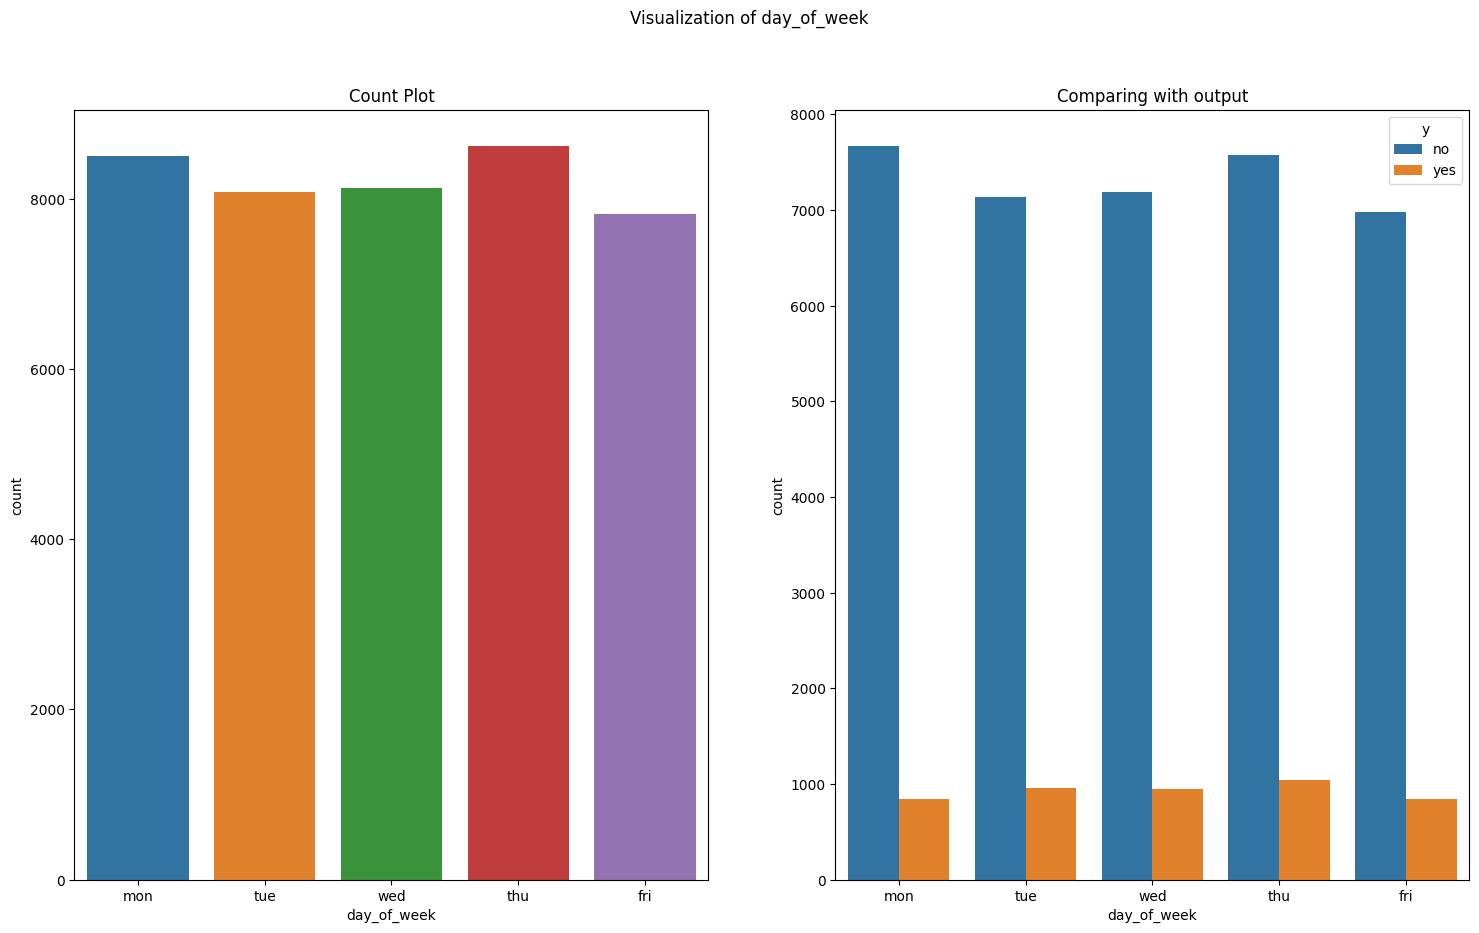

In [17]:
univariate_viz_with_desc("day_of_week")

--------------------------------------------------------
Unique values in column: poutcome 
 ['nonexistent' 'failure' 'success']
--------------------------------------------------------
Value Counts in column: poutcome 
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for poutcome: 
 {"('failure', 'no')":3647,"('failure', 'yes')":605,"('nonexistent', 'no')":32422,"('nonexistent', 'yes')":3141,"('success', 'yes')":894,"('success', 'no')":479}
--------------------------------------------------------


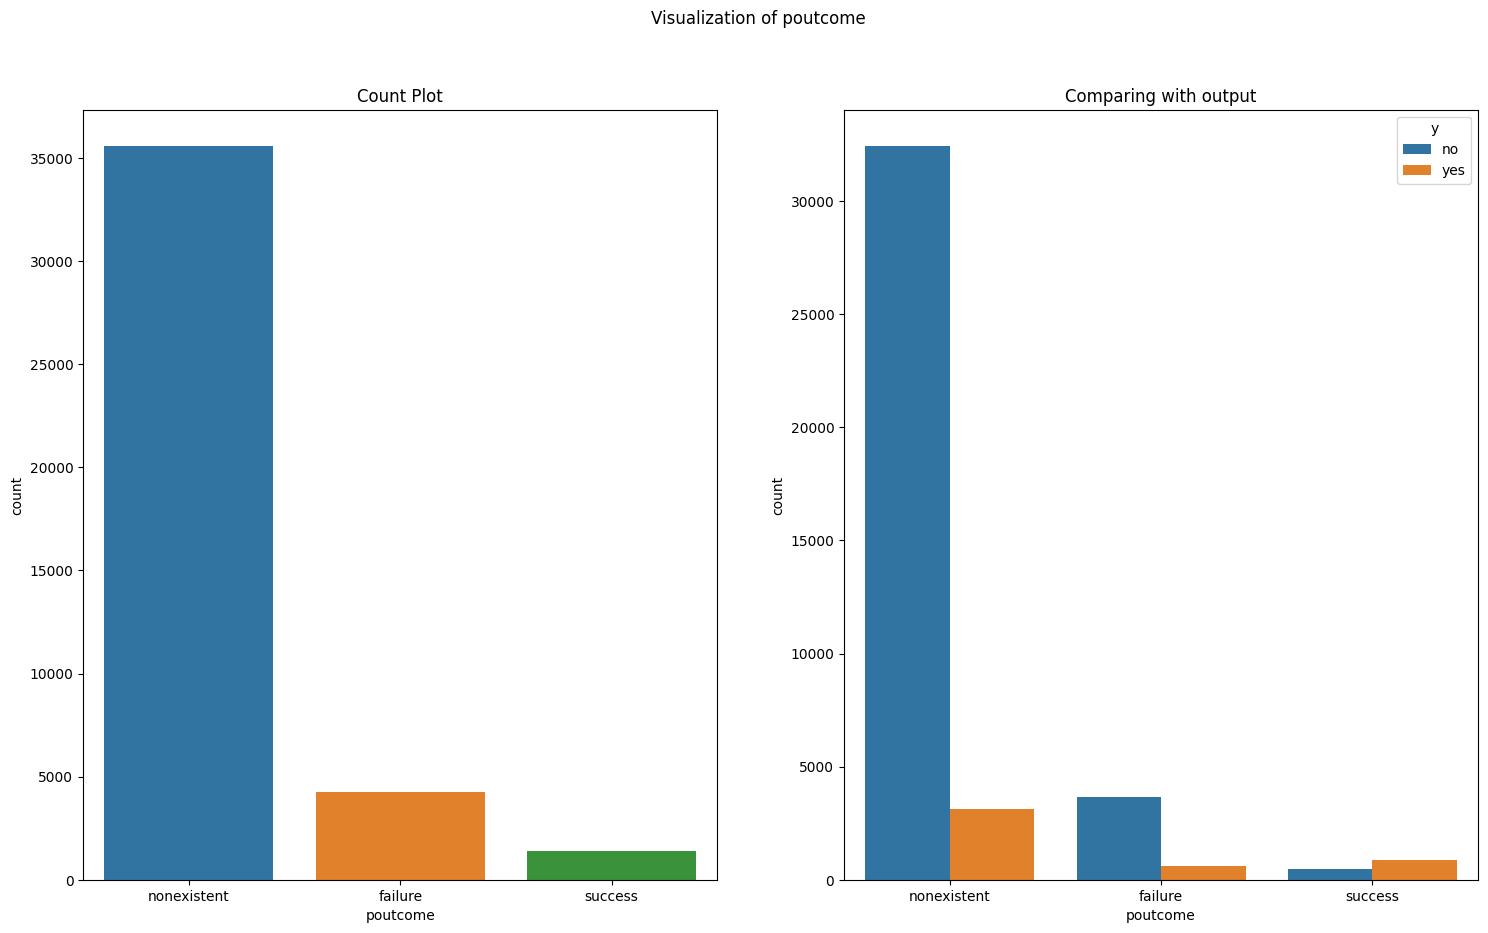

In [18]:
univariate_viz_with_desc("poutcome")

--------------------------------------------------------
Unique values in column: y 
 ['no' 'yes']
--------------------------------------------------------
Value Counts in column: y 
 no     36548
yes     4640
Name: y, dtype: int64
--------------------------------------------------------
Counts after grouping by outcome for y: 
 {"('no', 'no')":36548,"('yes', 'yes')":4640}
--------------------------------------------------------


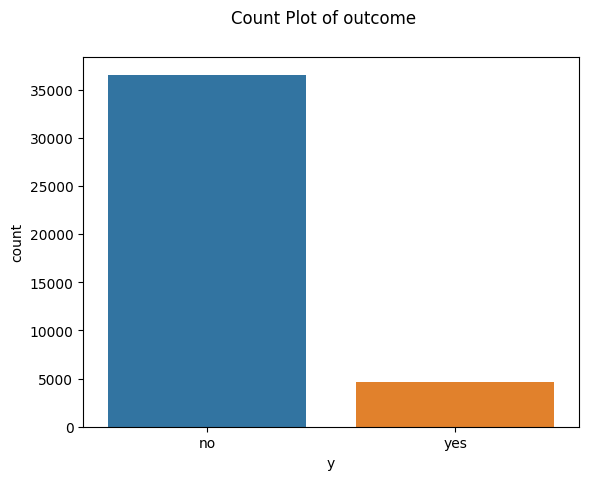

In [20]:
categorical_data_description("y")
plt.suptitle("Count Plot of outcome")
sns.countplot(data=dataset, x=dataset["y"])
plt.show()

## For Continuous Data

--------------------------------------------------------
Descriptive information of age: 
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
--------------------------------------------------------


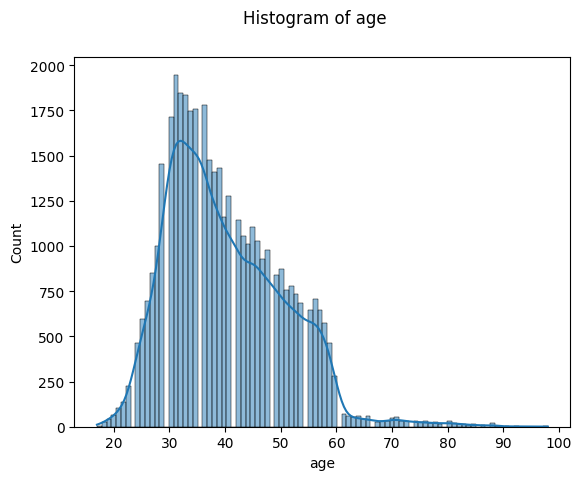

In [29]:
univariate_viz_with_desc("age")


--------------------------------------------------------
Descriptive information of duration: 
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
--------------------------------------------------------


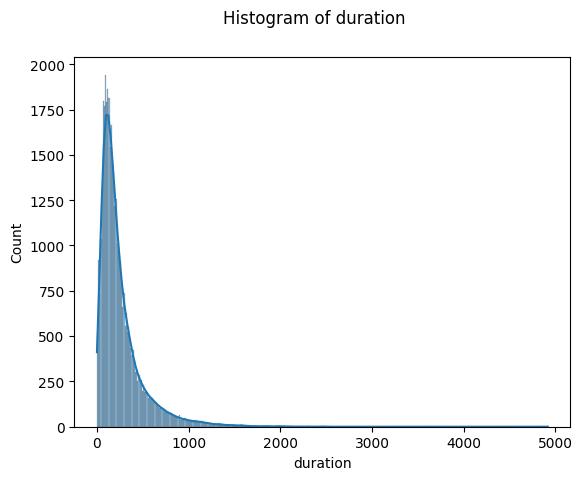

In [30]:
univariate_viz_with_desc("duration")

--------------------------------------------------------
Descriptive information of campaign: 
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
--------------------------------------------------------


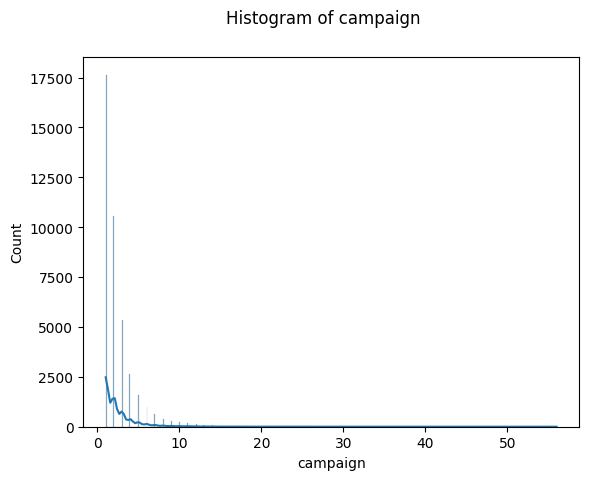

In [31]:
univariate_viz_with_desc("campaign")

--------------------------------------------------------
Descriptive information of pdays: 
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
--------------------------------------------------------


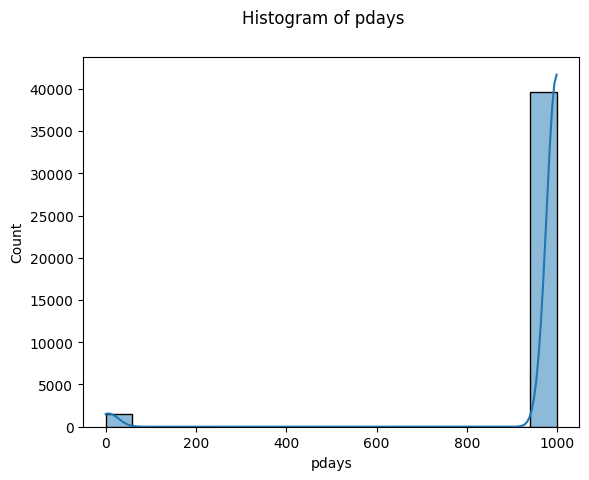

In [32]:
univariate_viz_with_desc("pdays")

--------------------------------------------------------
Descriptive information of previous: 
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
--------------------------------------------------------


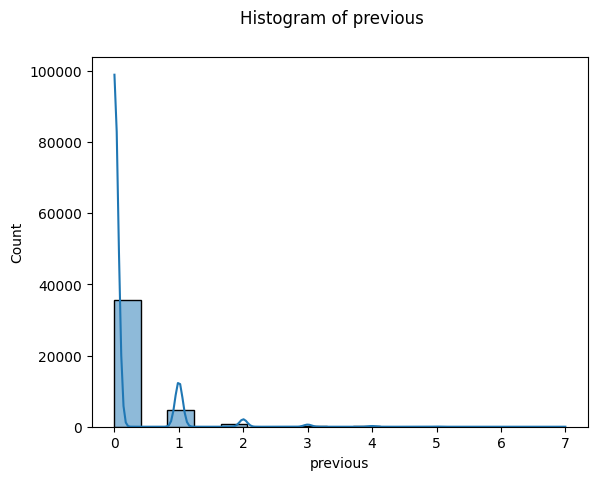

In [33]:
univariate_viz_with_desc("previous")

--------------------------------------------------------
Descriptive information of emp.var.rate: 
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64
--------------------------------------------------------


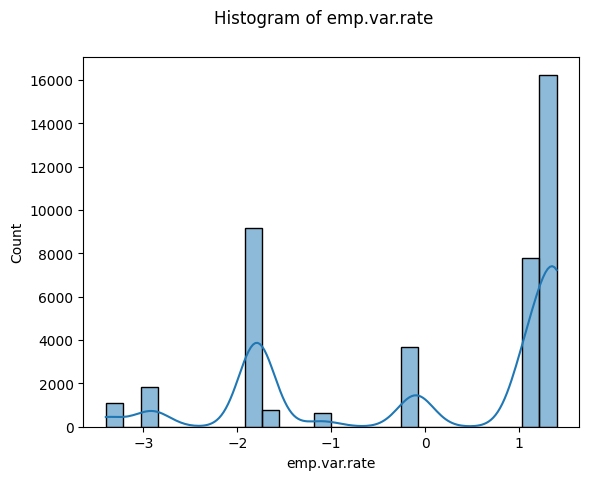

In [35]:
univariate_viz_with_desc("emp.var.rate")

--------------------------------------------------------
Descriptive information of cons.price.idx: 
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64
--------------------------------------------------------


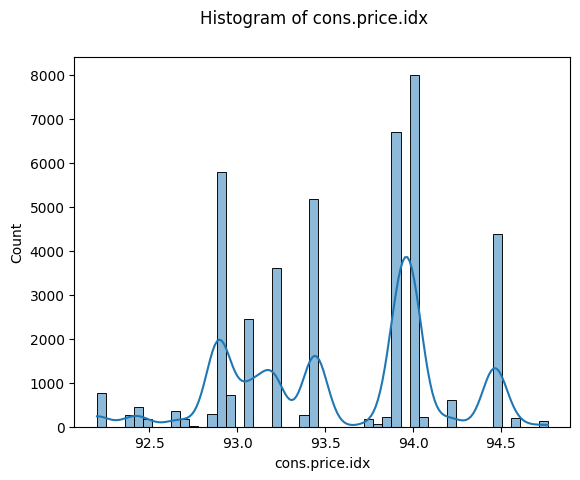

In [36]:
univariate_viz_with_desc("cons.price.idx")

--------------------------------------------------------
Descriptive information of cons.conf.idx: 
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
--------------------------------------------------------


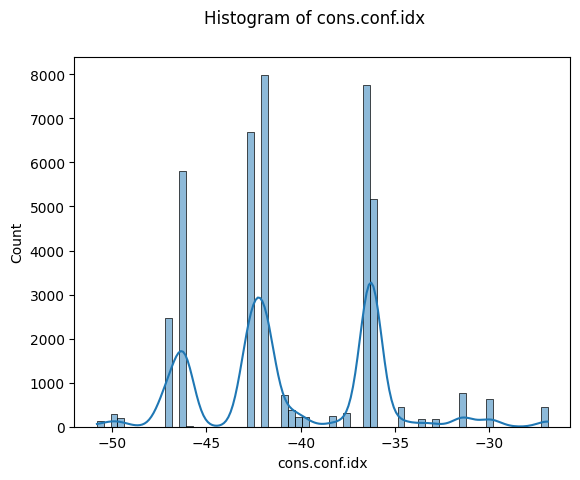

In [37]:
univariate_viz_with_desc("cons.conf.idx")

--------------------------------------------------------
Descriptive information of euribor3m: 
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
--------------------------------------------------------


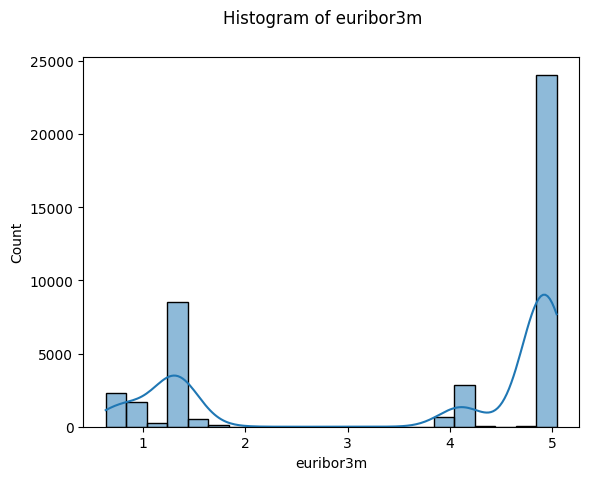

In [38]:
univariate_viz_with_desc("euribor3m")

--------------------------------------------------------
Descriptive information of nr.employed: 
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
--------------------------------------------------------


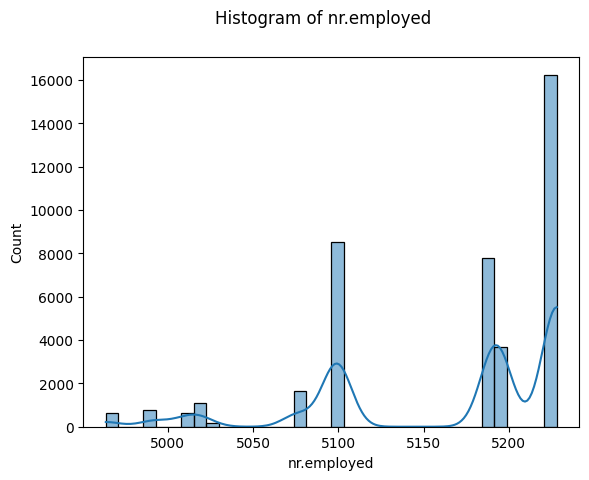

In [39]:
univariate_viz_with_desc("nr.employed")

<h1>Bivariate Analysis Before preprocessing and feature engineering of data</h1>

In [ ]:
# Common function for count plot
def univariate_vizualization(data:str, include:list):
    num_of_subplots = len(include)

    fig, ax = plt.subplots(1, include, figsize=(10, 7))
    fig.suptitle(f"Univariate Analysis of {data}")

    def count_plot():
        ax[0].set_title("Count Plot")
        sns.countplot(dataset[data])

    def cat_plot():
        ax[1].set_title("Box Plot")
        sns.catplot(data, orient="h")
    
    count_plot()
    # cat_plot()

In [24]:
univariate_vizualization("job")

NameError: name 'univariate_vizualization' is not defined